In [4]:
from sklearn.datasets import fetch_lfw_people

lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw)

{'data': array([[254.33333 , 254.      , 252.      , ...,  87.      ,  88.666664,
         87.      ],
       [ 39.      ,  50.666668,  47.      , ..., 117.666664, 115.      ,
        133.      ],
       [ 89.666664, 103.666664, 126.333336, ..., 175.33333 , 183.33333 ,
        182.66667 ],
       ...,
       [ 86.666664,  80.      ,  74.333336, ...,  44.333332,  50.      ,
         44.666668],
       [ 50.666668,  65.333336,  88.333336, ..., 196.66667 , 178.66667 ,
        165.66667 ],
       [ 30.      ,  27.      ,  33.      , ...,  35.      ,  35.666668,
         61.      ]], dtype=float32), 'images': array([[[254.33333 , 254.      , 252.      , ...,  65.666664,
          51.333332,  40.333332],
        [253.33333 , 251.66667 , 247.66667 , ...,  66.666664,
          52.      ,  42.333332],
        [240.66667 , 231.33333 , 211.66667 , ...,  61.333332,
          49.      ,  41.666668],
        ...,
        [ 74.333336,  53.666668,  31.333334, ...,  97.333336,
          92.666664,  90.

In [5]:
print(lfw.data)

[[254.33333  254.       252.       ...  87.        88.666664  87.      ]
 [ 39.        50.666668  47.       ... 117.666664 115.       133.      ]
 [ 89.666664 103.666664 126.333336 ... 175.33333  183.33333  182.66667 ]
 ...
 [ 86.666664  80.        74.333336 ...  44.333332  50.        44.666668]
 [ 50.666668  65.333336  88.333336 ... 196.66667  178.66667  165.66667 ]
 [ 30.        27.        33.       ...  35.        35.666668  61.      ]]


In [25]:
print(lfw.target_names)
target_names=lfw.target_names

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [7]:
len(lfw.target_names)

7

In [8]:
len(lfw.target)

1288

In [9]:
len(lfw.data) 

1288

In [10]:
lfw.data

array([[254.33333 , 254.      , 252.      , ...,  87.      ,  88.666664,
         87.      ],
       [ 39.      ,  50.666668,  47.      , ..., 117.666664, 115.      ,
        133.      ],
       [ 89.666664, 103.666664, 126.333336, ..., 175.33333 , 183.33333 ,
        182.66667 ],
       ...,
       [ 86.666664,  80.      ,  74.333336, ...,  44.333332,  50.      ,
         44.666668],
       [ 50.666668,  65.333336,  88.333336, ..., 196.66667 , 178.66667 ,
        165.66667 ],
       [ 30.      ,  27.      ,  33.      , ...,  35.      ,  35.666668,
         61.      ]], dtype=float32)

In [11]:
lfw.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [28]:
print("Total dataset size :")
print("n_samples :",len(lfw.target))
print("n_features :",len(lfw.data))
print("n_classes :",len(lfw.target_names))

n_samples, h, w = lfw.images.shape
n_classes =len(lfw.target_names)

Total dataset size :
n_samples : 1288
n_features : 1288
n_classes : 7


In [13]:
x=lfw.data
y=lfw.target


In [14]:
#y=y.tolist()


In [15]:
print(y)

[5 6 3 ... 5 3 5]


In [16]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
from time import time
from sklearn.decomposition import PCA

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [18]:
print(len(xtrain))
print(len(xtest))
print(len(ytrain))
print(len(ytest))

966
322
966
322


In [19]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, xtrain.shape[0]))



Extracting the top 150 eigenfaces from 966 faces


In [20]:
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(xtrain)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
xtrain_pca = pca.transform(xtrain)
xtest_pca = pca.transform(xtest)
print("done in %0.3fs" % (time() - t0))

done in 0.489s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.046s


In [21]:
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from time import time


print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(xtrain_pca, ytrain)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
done in 41.999s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)


In [32]:
# Quantitative evaluation of the model quality on the test set
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(xtest_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(ytest, y_pred, target_names=target_names))

print(confusion_matrix(ytest, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
done in 0.239s
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.77      0.87        13
     Colin Powell       0.85      0.83      0.84        64
  Donald Rumsfeld       0.89      0.81      0.85        31
    George W Bush       0.80      0.97      0.88       133
Gerhard Schroeder       0.86      0.72      0.78        25
      Hugo Chavez       1.00      0.52      0.68        25
       Tony Blair       0.93      0.81      0.86        31

         accuracy                           0.85       322
        macro avg       0.90      0.77      0.82       322
     weighted avg       0.86      0.85      0.84       322

[[ 10   0   0   3   0   0   0]
 [  0  53   2   8   0   0   1]
 [  0   0  25   6   0   0   0]
 [  0   3   1 129   0   0   0]
 [  0   2   0   5  18   0   0]
 [  0   3   0   6   2  13   1]
 [  0   1   0   4   1   0  25]]


In [36]:
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

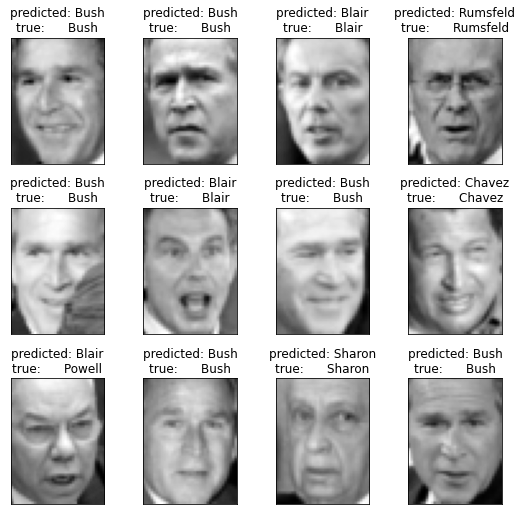

In [41]:
# plot the result of the prediction on a portion of the test set
import matplotlib.pyplot as plt

def title(y_pred, ytest, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[ytest[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, ytest, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(xtest, prediction_titles, h, w)



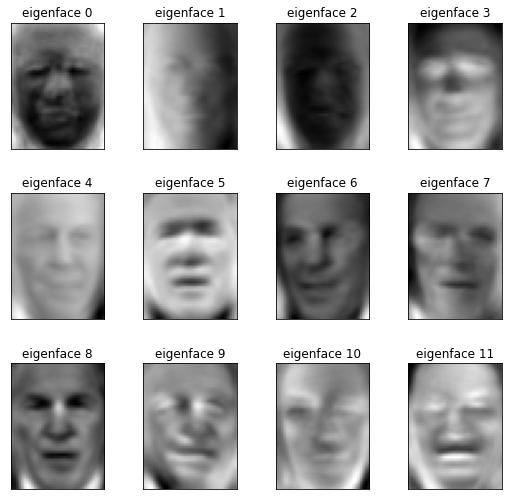

In [42]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()
